In [68]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline


n_squares = 4
small_board_list = [1]
for i in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
    
print("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))
small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))




Arrange wheat on a plate of 4 squares (list)：[1, 2, 4, 8]
Arrange wheat on a plate of 4 squares (ndarray)：[1 2 4 8]


# Problem 1: Number of wheat on a 2 x 2 square chess board

In [10]:
def wheat_2_2_square(small_board_ndarray):
    small_board_ndarray = small_board_ndarray.reshape(2,2) 
    return small_board_ndarray

print("Arrange wheat on a plate of 2 x 2 squares (ndarray)：\n {}".format(wheat_2_2_square(small_board_ndarray)))


Arrange wheat on a plate of 2 x 2 squares (ndarray)：
 [[1 2]
 [4 8]]


# Problem 2:Expansion to n × m mass

In [56]:
def wheat_8_8_square():
    n_squares = 8*8
    wheat_list = [1]
    for i in range(n_squares - 1):
        wheat_list.append(wheat_list[-1]*2)
    wheat_ndarray = np.array(wheat_list)
    wheat_ndarray = wheat_ndarray.reshape(8, 8)
    return wheat_ndarray.astype(np.uint64)
wheat_in_8_8 = wheat_8_8_square()
print("Arrange wheat on a plate of 8 x 8 squares (ndarray)：\n {}".format(wheat_in_8_8))

Arrange wheat on a plate of 8 x 8 squares (ndarray)：
 [[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35

# Problem 3: Total number of wheat

Total weak in 64 days: 18446744073709551615


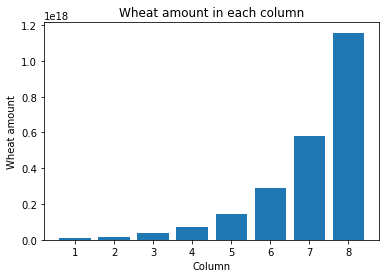

In [57]:
def total_number_of_wheat_8_8(wheat_ndarray):   
    col_avg = np.array([])
    for i in range(8):
        col_avg = wheat_ndarray.mean(axis = 0)
    return np.sum(wheat_ndarray).astype(np.uint64), col_avg.astype(np.uint64)

wheat_sum, col_avg = total_number_of_wheat_8_8(wheat_in_8_8)

print("Total weak in 64 days: {}".format(wheat_sum))

plt.xlabel("Column")
plt.ylabel("Wheat amount")
plt.title("Wheat amount in each column")
plt.bar(np.arange(1,9), col_avg)
plt.show()


    

# Problem 4: Heat map of the number of wheat

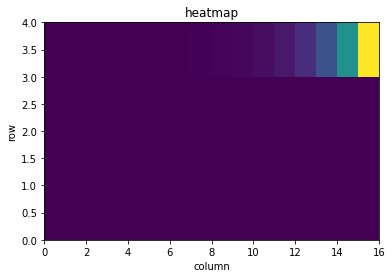

In [67]:

def heat_map_wheat(ndarray):
    plt.xlabel("column")
    plt.ylabel("row")
    plt.title("heatmap")
    plt.pcolor(ndarray.reshape(4, 16))
    plt.show()

heat_map_wheat(wheat_in_8_8);
    

# Problem 5: How many times is the second half as long as the first half?

In [79]:
def time_comparison():
    n_squares = 8*8
    wheat_list = [1]
    start_first_half = time.time()
    for i in range(1, 31):
        wheat_list.append(wheat_list[-1]*2)
    elasped_time_first_half = time.time() - start_first_half
    
    start_second_half = time.time()
    for i in range(31, 64):
        wheat_list.append(wheat_list[-1]*2)
    elasped_time_second_half = time.time() - start_second_half
    
    return elasped_time_first_half ,elasped_time_second_half

elasped_time_first_half, elasped_time_second_half = time_comparison()
try:
    print("Second half is faster than first half: {} time".format(elasped_time_second_half/elasped_time_first_half))
except ZeroDivisionError as error:
    print("Can't compare time because of: {}".format(error))

Can't compare because of: float division by zero


# Problem 6: Expansion to $n \times m$ mass by another calculation method

In [115]:
def expansion_8_8_square():
    n_squares = 64
    wheat_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        wheat_ndarray = np.append(wheat_ndarray, 2*wheat_ndarray[-1]).astype(np.uint64)
    return wheat_ndarray.reshape(8, 8)
    
wheat_ndarray = expansion_8_8_square()
print(wheat_ndarray)
print("Number of wheat in the last trout：{}".format(wheat_ndarray[-1, - 1]))


[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

In [116]:
def expansion_8_8_square_2():   
    n_squares = 64
    indices_of_squares = np.arange(n_squares)
    board_ndarray = 2**indices_of_squares.astype(np.uint64) 
    return board_ndarray.reshape(8, 8)

wheat_ndarray_2 = expansion_8_8_square_2()
print(wheat_ndarray_2)
print("Number of wheat in the last trout：{}".format(wheat_ndarray_2[-1, -1]))


[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

# Problem 7: Comparing calculation times


First implementation:

In [126]:
%%timeit
wheat_8_8_square()


53.9 µs ± 693 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Second implementation:

In [127]:
%%timeit
expansion_8_8_square()


1.87 ms ± 74.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Third implementation:

In [128]:
%%timeit
expansion_8_8_square_2()


11.9 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
